# Bike Sharing Demand

In [1]:
import pandas as pd
# 読み込むファイルの場所は各々で指定してください。
df = pd.read_csv("train.csv")
df.shape

(10886, 12)

In [2]:
# 欠損値はいくつあるか
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
from datetime import datetime

# 日付を格納
df["date"] = df.datetime.apply(lambda x : x.split()[0])
# 時間を格納
df["hour"] = df.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
# 年を格納
df["year"] = df.datetime.apply(lambda x : x.split()[0].split("-")[0]).astype("int")
# 曜日を格納
df["weekday"] = df.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
# 月情報を格納
df["month"] = df.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,2011,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,2011,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,2011,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,2011,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,2011,5,1


In [6]:
# それぞれの必要な方に変換して格納したので削除
df = df.drop('datetime',axis=1)
df = df.drop('date',axis=1)
# casualとrefisteredの列のデータはテストデータにないため削除
df = df.drop('casual', axis=1)
df = df.drop('registered', axis=1)
df.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
hour            int32
year            int32
weekday         int64
month           int64
dtype: object

In [7]:
df['Count']=df['count']
df = df.drop('count', axis=1)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,weekday,month,Count
0,1,0,0,1,9.84,14.395,81,0.0,0,2011,5,1,16
1,1,0,0,1,9.02,13.635,80,0.0,1,2011,5,1,40
2,1,0,0,1,9.02,13.635,80,0.0,2,2011,5,1,32
3,1,0,0,1,9.84,14.395,75,0.0,3,2011,5,1,13
4,1,0,0,1,9.84,14.395,75,0.0,4,2011,5,1,1


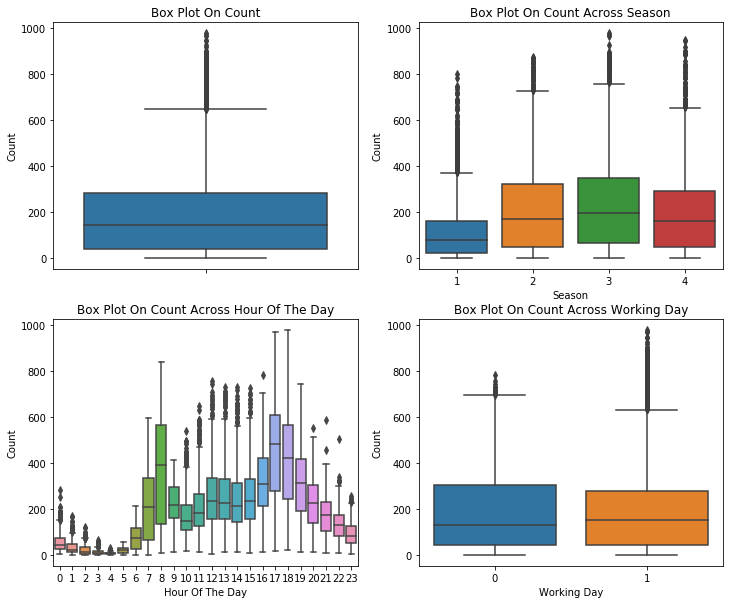

In [8]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
# Countの箱ひげ図
sn.boxplot(data=df,y="Count",orient="v",ax=axes[0][0])
sn.boxplot(data=df,y="Count",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=df,y="Count",x="hour",orient="v",ax=axes[1][0])
sn.boxplot(data=df,y="Count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
plt.show()

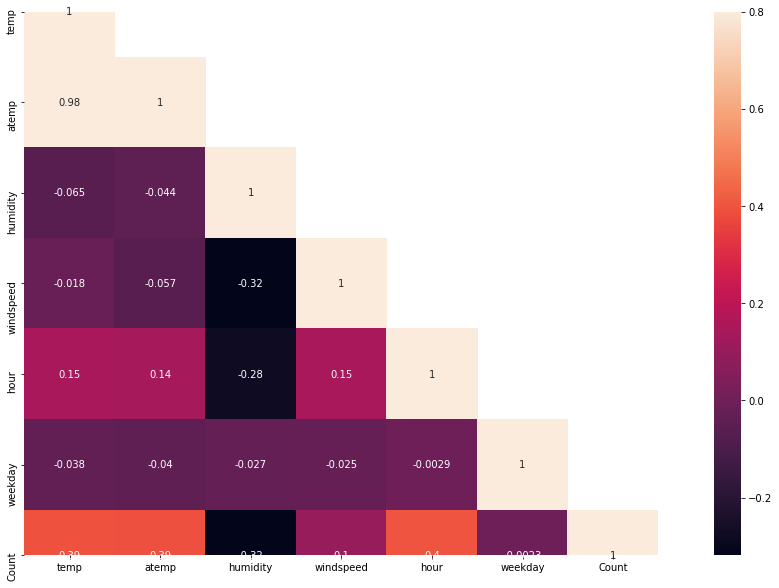

In [10]:
import numpy as np

corrMatt = df[["temp","atemp","humidity","windspeed","hour","weekday","Count"]].corr()
# corrMattの項目での相関行列を代入
mask = np.array(corrMatt)
# 相関行列の表示方法
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

# ランダムフォレストによる予測# 

In [11]:
df.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
hour            int32
year            int32
weekday         int64
month           int64
Count           int64
dtype: object

In [12]:
# データを二つに分離
train_data = df.values
x = train_data[:, :11] # Count以前の変数
y = train_data[:, 12]  # 正解データ（Count）

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
forest = RandomForestRegressor(n_estimators=100)

# 学習する
forest = forest.fit(x, y)

モデルを生成したので、テストデータに当てはめ、Countの値を予測したいのですが、その前にテストデータの要因をトレーニングデータと同じように設定する必要があります。

In [13]:
# 読み込むファイルの場所は各々で指定してください。
test_df = pd.read_csv("test.csv")
# 日付を格納
test_df["date"] = test_df.datetime.apply(lambda x : x.split()[0])
# 時間を格納
test_df["hour"] = test_df.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
# 年を格納
test_df["year"] = test_df.datetime.apply(lambda x : x.split()[0].split("-")[0]).astype("int")
# 曜日を格納
test_df["weekday"] = test_df.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
# 月情報を格納
test_df["month"] = test_df.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

test_df = test_df.drop('date',axis=1)
# 欠損値はいくつあるか
test_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
hour          0
year          0
weekday       0
month         0
dtype: int64

In [14]:
test_data = test_df.values
x_test = test_data[:, 1:12]
output = forest.predict(x_test)

zip_data = zip(test_data[:,0], output)
predict_data = list(zip_data)

In [16]:
import csv

with open("submission.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["datetime", "count"])
    for datetime, count in zip(test_data[:,0], output.astype(int)):
        writer.writerow([datetime, count])